In [22]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8) # set default figure size
from sklearn.linear_model import LinearRegression
import scipy.stats as sp
import numpy as np

In [2]:
# import merged dataset 

df = pd.read_csv('https://raw.githubusercontent.com/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/main/merged.csv')
df.head()

,Hour,Day,Month,CrashCount,Precipitation,Snow_Dummy,Precipitation_Dummy
0,0,1,1,14,0.060714,0,1
1,0,1,2,13,0.019231,1,1
2,0,1,3,19,0.247368,1,1
3,0,1,4,19,0.015789,0,1
4,0,1,5,11,0.085455,0,1


In [40]:
df['Date'] = df['Month'].map(str) + '-' + df['Day'].map(str)
df.set_index('Date', inplace=True)
df.head()

,Hour,Day,Month,CrashCount,Precipitation,Snow_Dummy,Precipitation_Dummy
Date,,,,,,,
1-1,0,1,1,14,0.060714,0,1
2-1,0,1,2,13,0.019231,1,1
3-1,0,1,3,19,0.247368,1,1
4-1,0,1,4,19,0.015789,0,1
5-1,0,1,5,11,0.085455,0,1


In [65]:
# create a DataFrame of aggregated CrashCount and average precipitation by the hour

daily = df.groupby(['Hour'], as_index= False).agg({'CrashCount':'mean', 'Precipitation': 'mean'})
daily

,Hour,CrashCount,Precipitation
0,0,17.027322,0.112938
1,1,17.382514,0.109386
2,2,18.494536,0.115991
3,3,15.568306,0.118683
4,4,12.877049,0.118119
5,5,9.972603,0.127050
6,6,7.489071,0.128849
7,7,6.518006,0.111546
8,8,6.408333,0.115094
9,9,6.940845,0.134363


                                 OLS Regression Results                                
Dep. Variable:             CrashCount   R-squared (uncentered):                   0.686
Model:                            OLS   Adj. R-squared (uncentered):              0.672
Method:                 Least Squares   F-statistic:                              50.22
Date:                Tue, 27 Apr 2021   Prob (F-statistic):                    3.22e-07
Time:                        02:55:50   Log-Likelihood:                         -81.403
No. Observations:                  24   AIC:                                      164.8
Df Residuals:                      23   BIC:                                      166.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

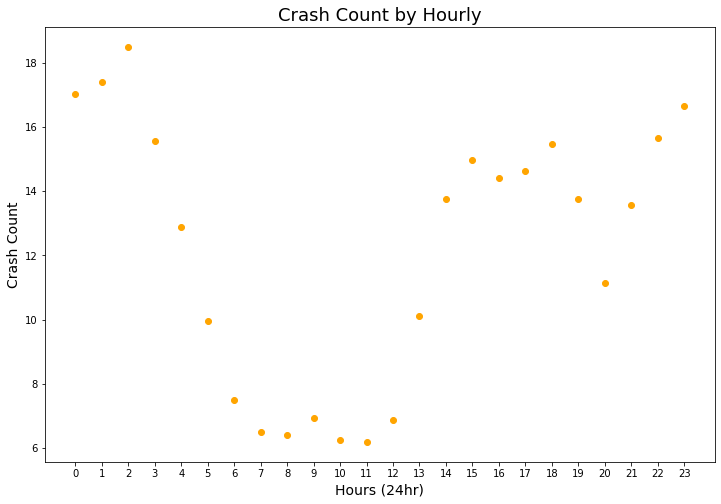

In [64]:
# Perform OLS Regression based on daily data and display results

x = daily['Hour']
y = daily['CrashCount']

result1 = sm.OLS(y, x).fit()
print(result1.summary())

# display crash count by the hour
plt.scatter(x, y, color = 'orange')
plt.xticks(x.values)
plt.xlabel('Hours (24hr)', fontsize = 14)
plt.ylabel('Crash Count', fontsize = 14)
plt.title('Crash Count by Hourly', fontsize = 18)

plt.show()

                                 OLS Regression Results                                
Dep. Variable:             CrashCount   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              175.9
Date:                Tue, 27 Apr 2021   Prob (F-statistic):                    2.93e-12
Time:                        02:56:56   Log-Likelihood:                         -69.411
No. Observations:                  24   AIC:                                      140.8
Df Residuals:                      23   BIC:                                      142.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

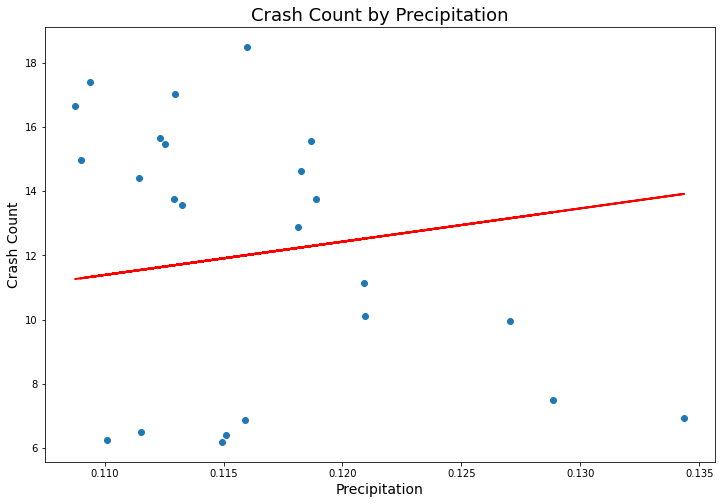

In [66]:
# Perform OLS Regression based on precipitation data and display results

prec = daily['Precipitation']
y = daily['CrashCount']

result2 = sm.OLS(y, prec).fit()
print(result.summary())

# Predict values
result_pred = result2.predict()

# Plot regression against actual data
plt.plot(prec, y, 'o') # scatter plot showing actual data
plt.plot(prec, result_pred, 'r', linewidth=2)   # regression line
plt.xlabel('Precipitation', fontsize = 14)
plt.ylabel('Crash Count', fontsize = 14)
plt.title('Crash Count by Precipitation', fontsize = 18 )

plt.show()